<a href="https://colab.research.google.com/github/ikhlas15/ATHENS-AI-Medical-Imaging/blob/main/H09_evaluation_and_clinical_metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Notebook 09: Advanced Evaluation for Medical Imaging Models**

### **Course**: Artificial Intelligence in Medical Imaging: From Fundamentals to Applications

***

## **1. Introduction**

Welcome to Notebook 09. You have successfully trained a baseline CNN model. Now comes a question that is just as important as building the model: **How good is it, really?**

In medical applications, a simple accuracy score is often insufficient and can even be dangerously misleading. A model that is 99% accurate at detecting a rare disease might be useless if it achieves that by simply predicting "no disease" for every patient. We need a more nuanced and clinically-aware approach to evaluation.

#### **What you will learn today:**
*   Why accuracy is not enough for medical tasks, especially with class imbalance.
*   The **Confusion Matrix** and how to derive key metrics from it:
    *   **Precision** (Positive Predictive Value)
    *   **Recall** (Sensitivity or True Positive Rate)
    *   **Specificity** (True Negative Rate)
    *   **F1-Score**
*   **Threshold-independent evaluation** using curves:
    *   The **ROC (Receiver Operating Characteristic) Curve** and **AUC (Area Under the Curve)**.
    *   The **Precision-Recall (PR) Curve** and **Average Precision (AP)**.
*   How to assess model confidence using **Calibration Curves**.
*   **Threshold Tuning**: How to choose an operating point that meets specific clinical needs (e.g., "we cannot miss more than 5% of cases").

***

## **2. Setup: Getting Ready for Evaluation**

We'll need our standard libraries, with a strong focus on `scikit-learn`'s comprehensive metrics module.

In [ ]:
# TODO: Install essential packages: PyTorch, torchvision, MedMNIST dataset, sklearn, and seaborn
!pip install ... ... ... ... ...

# --- PyTorch core functionality ---
# Import PyTorch base library
import ...
# Import neural network module (e.g. layers like Linear, Conv2d)
import torch.nn as ...
# Import optimization algorithms (e.g. Adam, SGD)
import torch.optim as ...
# Import dataset utilities: DataLoader for batching, Subset for splitting
from torch.utils.data import ..., ...

# --- Torchvision transforms for image preprocessing/augmentation ---
# Import torchvision transforms (e.g. ToTensor, Normalize)
import torchvision. ... as ...

# --- MedMNIST dataset loader ---
# Import the PneumoniaMNIST dataset class
from medmnist import ...

# --- Other standard utilities ---
# Import NumPy for numerical operations
import ...
# Import Matplotlib for plotting
import matplotlib.___________ as ...

# --- scikit-learn metrics for evaluation ---
from sklearn.metrics import (
    ...,        # build confusion matrix (TP, FP, TN, FN)
    ...,          # overall correctness
    ... ,         #precision (positive predictive value)
    ...,            # recall (sensitivity)
    ...,                # metric combining precision and recall into one score
    ...,               # compute ROC curve points
    ...,           # area under ROC curve
    ...,  #  Precision–Recall curve
    ... # average precision (area under PR curve)
)


# TODO: import calibration_curve to assess predicted probability reliability
from sklearn.calibration import ...

# --- Visualization library ---
# Import seaborn for prettier plots (e.g., heatmaps for confusion matrix)
import ...

# --- Reproducibility and device setup ---
# Set random seed for reproducibility
torch.manual_seed(...)
# Define the device (GPU if available, else CPU)
device = torch.device("..." if torch.cuda.is_available() else "...")
print(f"Using device: {device}")


***

## **3. Preparing Model Predictions for Evaluation**

To evaluate a model, we need two things from our validation or test set:
1.  **The ground truth labels** (what the diagnosis actually is).
2.  **The model's predicted probabilities** for the positive class (e.g., the probability of pneumonia).

We will retrain our baseline CNN from the last notebook to get these predictions. If you have a saved model, you could load it here instead.


In [ ]:
# --- Data Loading ---
# TODO: define basic transforms: convert to tensor and normalize to [-1, 1]
data_transforms = transforms.Compose([transforms. ..., # Convert PIL image to tensor
                                      transforms. (mean=[0.5], std=[0.5])]) # Normalize using mean = 0.5 and std = 0.5
# Load train, val and test datasets with transforms
train_dataset = PneumoniaMNIST(split='...', transform=data_transforms, download=True)
val_dataset = PneumoniaMNIST(split='val', transform= .... , download=True)
# test_dataset = PneumoniaMNIST(split='test', transform=data_transforms, download=True)
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=64, shuffle= ...)
# test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

# --- Model Definition ---
class BaselineCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv_block1 = nn.Sequential(nn.Conv2d(, , 3, padding=1), # Conv2D layer (e.g. 1 → 32) with kernel size = 3*3
                                         nn.ReLU(),
                                         nn.MaxPool2d( ...)) # with kernel size 2*2
        self.conv_block2 = nn.Sequential(nn.Conv2d(...,... ,... , padding=1), # Conv2D layer (e.g. 32 → 64) with kernel size = 3*3
                                         nn. ..., # Use ReLU
                                         nn.MaxPool2d(2))
        self.classifier = nn.Sequential(nn.Flatten(),
                                        nn.Linear(64 * 7 * 7, 128),
                                        nn.ReLU(),
                                        nn.Linear(128, ...)) # Hidden → 2 output classes
    def forward(self, x): return self.classifier(self.conv_block2(self.conv_block1(x)))

# Initializa the model on the device
model = BaselineCNN().to(...)
# Use CrossEntropyLoss
criterion = nn.
# Use Adam optimizer
optimizer = optim. ...(model.parameters(), lr=0.001)

# --- Quick Training Loop ---
print("Training a model to get predictions...")
for epoch in range(5): # A short training run for demonstration
# Set the training mode
    model.
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device).squeeze().long()
        # TODO: Reset gradients
        optimizer.
        # TODO: do the forward
        outputs = (images)
        # TODO: compute the loss using criterion
        loss = (outputs, labels)
        loss.backward()
        #TODO: Update the weights
        optimizer.
    print(f"Epoch {epoch+1} finished.")

# --- Get Predictions on Validation Set ---
def get_predictions(model, data_loader, device):
  #Set the evaluation mode
    model.
    all_labels = []
    # Define an empty list to save the probabilites of the prediction
    all_probs =
    with torch.no_grad():
        for images, labels in : # the images and labels are in data loader
            images = images.to(device)
            outputs = model(images)
            # Use softmax to convert raw logits to probabilities
            probs = torch....(outputs, dim=1)[:, 1] # Get probability of the positive class (pneumonia)
            all_probs.extend(probs.cpu().numpy())
            all_labels.extend(labels.cpu().numpy().) #TODO: flatten the labels
    return np.array(all_labels), ...(all_probs)  #TODO: return all_probs as numpy array

# Call get predictions function
true_labels, predicted_probs = ...(model, val_loader, device)
print(f"\nObtained {len(true_labels)} predictions.")

Training a model to get predictions...
Epoch 1 finished.
Epoch 2 finished.
Epoch 3 finished.
Epoch 4 finished.
Epoch 5 finished.

Obtained 524 predictions.


***

## **4. The Confusion Matrix: A Deeper Look at Performance**

A confusion matrix is the foundation of most classification metrics. It's a table that breaks down the predictions into four categories. For our pneumonia detector:

*   **True Positives (TP):** The model correctly predicted 'Pneumonia'.
*   **True Negatives (TN):** The model correctly predicted 'Normal'.
*   **False Positives (FP):** The model incorrectly predicted 'Pneumonia' (a "false alarm").
*   **False Negatives (FN):** The model incorrectly predicted 'Normal' (a "missed case").

To get these counts, we first need to convert our model's probabilities into firm predictions (0 or 1) by applying a **decision threshold**. The default is typically 0.5.


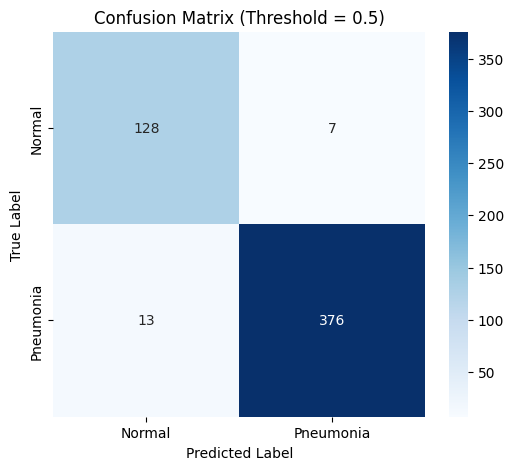

In [ ]:
# Set a decision threshold (0.5)
threshold =

# Convert probabilities to predicted labels using the chosen threshold
predicted_labels = (predicted_probs >= ...).astype(int)

# Calculate and plot the confusion matrix
cm = (true_labels, predicted_labels)

plt.figure(figsize=(6, 5))
sns.heatmap(..., annot=True, fmt='d', cmap='Blues',
            xticklabels=['Normal', 'Pneumonia'], yticklabels=['Normal', 'Pneumonia'])
plt.title(f"Confusion Matrix (Threshold = {...})")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

### **From the Confusion Matrix to Key Metrics**

Now we can define our core clinical metrics:

*   **Accuracy:** `(TP + TN) / Total`. **What it tells us:** "Overall, what fraction of predictions were correct?" *Warning: This is misleading if the classes are imbalanced.*
*   **Precision (Positive Predictive Value):** `TP / (TP + FP)`. **What it tells us:** "When the model predicts 'Pneumonia', how often is it right?" High precision minimizes false alarms.
*   **Recall (Sensitivity):** `TP / (TP + FN)`. **What it tells us:** "Of all the actual pneumonia cases, how many did the model find?" High recall minimizes missed cases.
*   **Specificity:** `TN / (TN + FP)`. **What it tells us:** "Of all the normal cases, how many did the model correctly identify as normal?"
*   **F1-Score:** `2 * (Precision * Recall) / (Precision + Recall)`. A harmonic mean of precision and recall, providing a single score that balances both.


In [ ]:
# Calculate metrics using scikit-learn
accuracy = accuracy_score(true_labels, ...)
precision = precision_score(..., predicted_labels)
recall = recall_score(true_labels, predicted_labels)
f1 = ...(true_labels, predicted_labels)

print(f"Metrics at Threshold = {threshold}:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall (Sensitivity): {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Metrics at Threshold = 0.5:
Accuracy: 0.9618
Precision: 0.9817
Recall (Sensitivity): 0.9666
F1-Score: 0.9741


**Clinical Thought Experiment:** For a cancer screening test, would you prioritize higher Precision or higher Recall? (Usually Recall, because missing a case is far worse than a false alarm that leads to more testing).

***

## **5. Threshold-Independent Evaluation: ROC and PR Curves**

The metrics above all depend on the threshold we chose (0.5). A better way to evaluate the model's overall discriminative power is to look at its performance across *all possible thresholds*.

### **The ROC Curve**

The ROC curve plots **Recall (True Positive Rate)** against the **False Positive Rate** (`FP / (FP + TN)`) at every possible threshold. A perfect model would go straight up to the top-left corner (100% recall, 0% false positives).

The **Area Under the Curve (AUC)** summarizes the entire curve into a single number.
*   **AUC = 1.0:** Perfect classifier.
*   **AUC = 0.5:** Useless classifier (no better than random guessing).

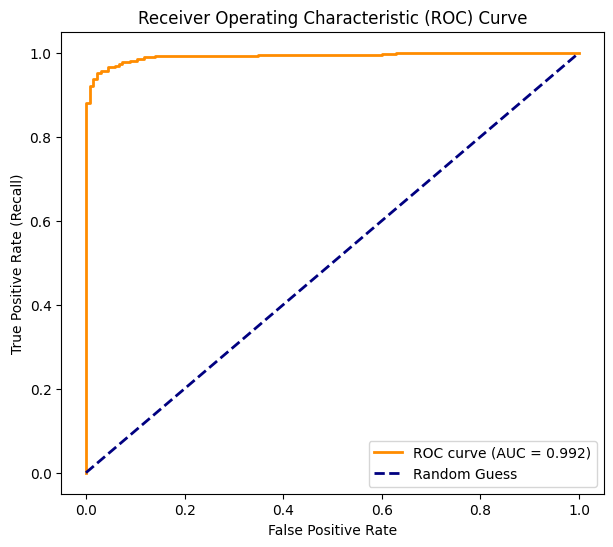

In [ ]:
# Calculate ROC curve and AUC
fpr, tpr, roc_thresholds = (true_labels, predicted_probs)
roc_auc = roc_auc_score(, )

plt.figure(figsize=(7, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
#Show the result

### **The Precision-Recall (PR) Curve**

The PR curve plots **Precision** against **Recall** at every threshold. This curve is especially informative when you have a class imbalance (e.g., a rare disease), as it is not influenced by the large number of True Negatives. The **Average Precision (AP)** is the area under this curve.


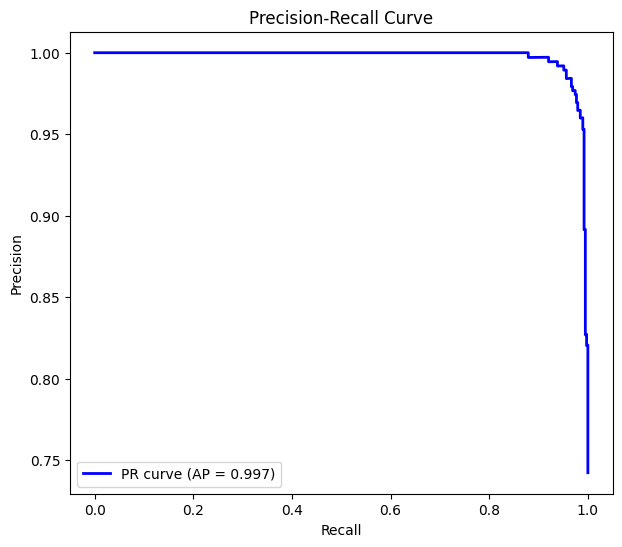

In [ ]:
# Calculate PR curve and Average Precision
prec, rec, pr_thresholds = precision_recall_curve(, )
avg_prec = (true_labels, predicted_probs)

plt.figure(figsize=(7, 6))
plt.plot(...,... , color='blue', lw=2, label=f'PR curve (AP = {avg_prec:.3f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
#TODO: set "Precision-Recall Curve" as a title for the plot
...
plt.legend(loc="lower left")
plt.show()

***

## **6. Calibration: Is Your Model's Confidence Meaningful?**

A well-calibrated model is one whose predicted probabilities reflect the true likelihood of an event. If a model predicts a 70% probability of pneumonia for 100 cases, we would expect about 70 of those patients to actually have pneumonia.

A **calibration curve** plots the observed frequency against the predicted probability. A perfectly calibrated model follows the diagonal line.


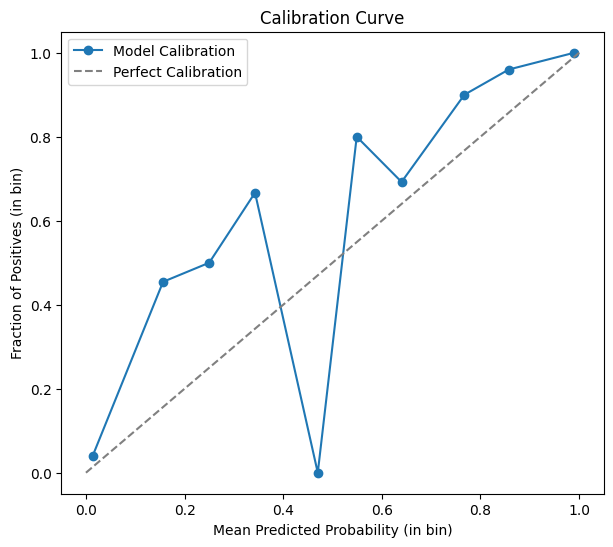

In [ ]:
#Use sklearn to compute calibration curve values with 10 bins
prob_true, prob_pred = (true_labels, predicted_probs, n_bins)

plt.figure(figsize=(7, 6))
plt.plot(..., prob_true, marker='o', linestyle='-', label='Model Calibration')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfect Calibration')
plt.xlabel('Mean Predicted Probability (in bin)')
plt.('Fraction of Positives (in bin)') #it represents the ylabel
plt.title('Calibration Curve')
plt.legend()
plt.show()

*If the blue line is far below the diagonal, the model is **overconfident**. If it's above, it's **underconfident**.*

***

## **7. Threshold Tuning for Clinical Deployment**

Finally, let's put this all together. Imagine a clinical requirement: "Our screening tool must not miss more than 10% of pneumonia cases." This means we need a **Recall (Sensitivity) of at least 90%**.

We can use our PR or ROC curve data to find the decision threshold that meets this requirement.


To achieve at least 90.0% recall, we must use a threshold of: 0.001
At this threshold, our Precision is 0.7424 and our Recall is 1.0000


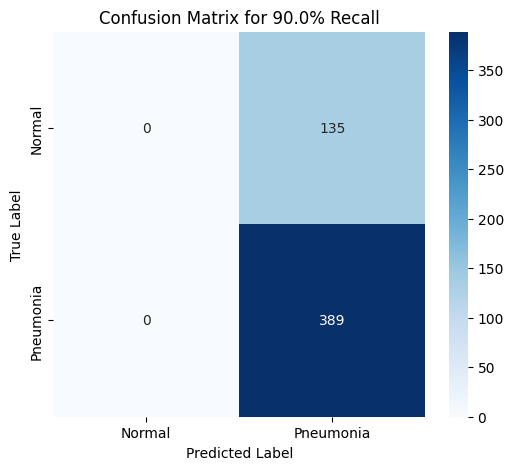

In [ ]:
# Find the threshold that achieves at least 90% recall
target_recall = 0.90
# We use the values from our PR curve calculation
# `pr_thresholds` has one less element than `rec` and `prec`
# TODO: select thresholds from PR curve where recall >= target_recall
valid_thresholds = pr_thresholds[rec[:-1] >= ... ]
# TODO: choose the first threshold that satisfies the condition, otherwise default to 0.5
final_threshold = ... if len(valid_thresholds) > 0 else ...

print(f"To achieve at least {target_recall*100}% recall, we must use a threshold of: {...:.3f}")

# Let's see the performance at this new threshold
# TODO: convert probabilities to labels using the selected threshold
final_predicted_labels = (predicted_probs >= ... ).astype(int)
final_precision = precision_score(true_labels, final_predicted_labels)
final_recall = recall_score(..., ...)

print(f"At this threshold, our Precision is {final_precision:.4f} and our Recall is {final_recall:.4f}")

# Plot the new confusion matrix
cm_final = ...(true_labels, final_predicted_labels)

plt.figure(figsize=(6, 5))
sns.heatmap(..., annot=True, fmt='d', cmap='Blues',
            xticklabels=['Normal', 'Pneumonia'], yticklabels=['Normal', 'Pneumonia'])
plt.title(f"Confusion Matrix for {...*100}% Recall")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

*Notice how the number of False Negatives (missed cases) has likely decreased, but the number of False Positives (false alarms) has increased. This is the fundamental trade-off in medical diagnostics.*

***

## **8. Summary and Next Steps**

In the next notebook, we will explore **Advanced CNN Architectures** like ResNet and U-Net, which are the workhorses of modern medical imaging AI.
